In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import shapefile
from sodapy import Socrata
from sklearn.preprocessing import normalize

sns.set()

### Load New York State county level test data

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("health.data.ny.gov","mRhWBVapSJGkcADRppBwX0Hle")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(health.data.ny.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("xdss-u53e", limit=20000)

# Convert to pandas DataFrame
test_record_df = pd.DataFrame.from_records(results)
test_record_df["test_date"] = pd.to_datetime(test_record_df["test_date"])
test_record_df["cumulative_number_of_positives"] = test_record_df["cumulative_number_of_positives"].astype(int)
test_record_df

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-04-18,Albany,34,682,305,7032
1,2020-04-18,Allegany,0,30,7,355
2,2020-04-18,Bronx,804,28823,2162,58605
3,2020-04-18,Broome,6,192,52,1383
4,2020-04-18,Cattaraugus,0,34,17,471
...,...,...,...,...,...,...
2971,2020-03-02,Washington,0,0,0,0
2972,2020-03-02,Wayne,0,0,0,0
2973,2020-03-02,Westchester,1,1,1,1
2974,2020-03-02,Wyoming,0,0,0,0


Now we can visualized the cumulative test positive over time for all of the counties in New York State

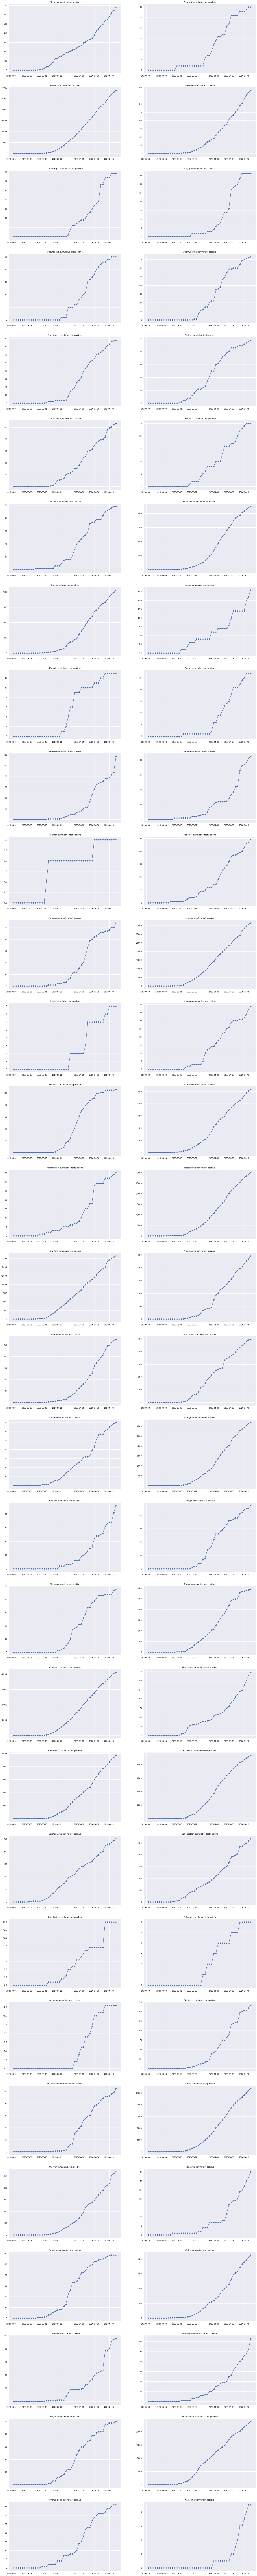

In [5]:
all_counties = test_record_df.county.unique()
fig, axes = plt.subplots(31, 2, figsize=(24, 256))
axes = axes.flatten()
for i, county in enumerate(all_counties):
    county_df = test_record_df[lambda x: x.county == county].sort_values("test_date")
    axes[i].plot(county_df.test_date, county_df.cumulative_number_of_positives, "-o")
    axes[i].set_title(county + " cumulative test positive")

### Load demographic data

In [6]:
demographic_df = pd.read_csv("Demographics.csv")
demographic_df.Counties = demographic_df.Counties.apply(lambda x: x.replace(" County", ""))
demographic_df = demographic_df.rename(columns={
    "Counties": "county", 
    "Total population, millions, 2020": "total_population", 
    "Older adults, 65+, 2017": "population_over_65",
    "Older adults, 80+, 2017": "population_over_80",
})
demographic_df

,county,total_population,population_over_65,population_over_80,"Diabetes prevalence (current, type I, II) (%)"
0,Albany,307117,"40,840","6,641",9%
1,Allegany,46430,"7,163",951,11%
2,Bronx,1432132,"147,488","21,058",13%
3,Broome,191659,"32,501","5,561",11%
4,Cattaraugus,76840,"12,519","1,794",13%
...,...,...,...,...,...
57,Washington,61197,"9,648","1,264",12%
58,Wayne,90064,"12,758","1,662",11%
59,Westchester,967612,"135,355","21,587",8%
60,Wyoming,40085,"5,530",762,12%


In [7]:
test_record_df.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'Steuben', 'St. Lawrence',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [8]:
demographic_df.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings (Brooklyn)', 'Lewis', 'Livingston', 'Madison', 'Monroe',
       'Montgomery', 'Nassau', 'New York (Manhattan)', 'Niagara',
       'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego',
       'Otsego', 'Putnam', 'Queens', 'Rensselaer',
       'Richmond (Staten Island)', 'Rockland', 'Saint Lawrence',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster',
       'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

#### Consolidate all county names to avoid loss of record on dataframe join

In [81]:
demographic_df.loc[demographic_df.county=="New York (Manhattan)", "county"] = "New York"
demographic_df.loc[demographic_df.county=="Richmond (Staten Island)", "county"] = "Richmond"
demographic_df.loc[demographic_df.county=="Saint Lawrence", "county"] = "St. Lawrence"
demographic_df.loc[demographic_df.county=="Kings (Brooklyn)", "county"] = "Kings"
demographic_df.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'St. Lawrence', 'Saratoga',
       'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [10]:
joined_df = pd.merge(test_record_df, demographic_df, on = "county")
# Make sure no information loss on dataset join
assert(len(joined_df) == len(test_record_df))
joined_df["test_positive_percentage"] = joined_df.cumulative_number_of_positives / joined_df.total_population
joined_df

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests,total_population,population_over_65,population_over_80,"Diabetes prevalence (current, type I, II) (%)",test_positive_percentage
0,2020-04-18,Albany,34,682,305,7032,307117,"40,840","6,641",9%,0.002221
1,2020-04-17,Albany,29,648,291,6727,307117,"40,840","6,641",9%,0.002110
2,2020-04-16,Albany,38,619,273,6436,307117,"40,840","6,641",9%,0.002016
3,2020-04-15,Albany,33,581,301,6163,307117,"40,840","6,641",9%,0.001892
4,2020-04-14,Albany,13,548,106,5862,307117,"40,840","6,641",9%,0.001784
...,...,...,...,...,...,...,...,...,...,...,...
2971,2020-03-06,Yates,0,0,0,0,24841,"4,066",492,14%,0.000000
2972,2020-03-05,Yates,0,0,0,0,24841,"4,066",492,14%,0.000000
2973,2020-03-04,Yates,0,0,0,0,24841,"4,066",492,14%,0.000000
2974,2020-03-03,Yates,0,0,0,0,24841,"4,066",492,14%,0.000000


With access of demographic data, we can now visualize the cumulative test positive over entire population for each county

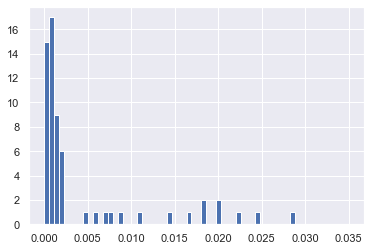

In [11]:
latested_joined_df = joined_df[joined_df.test_date==joined_df.test_date.max()]
latested_joined_df.test_positive_percentage.hist(range=(0, 0.035), bins=62)

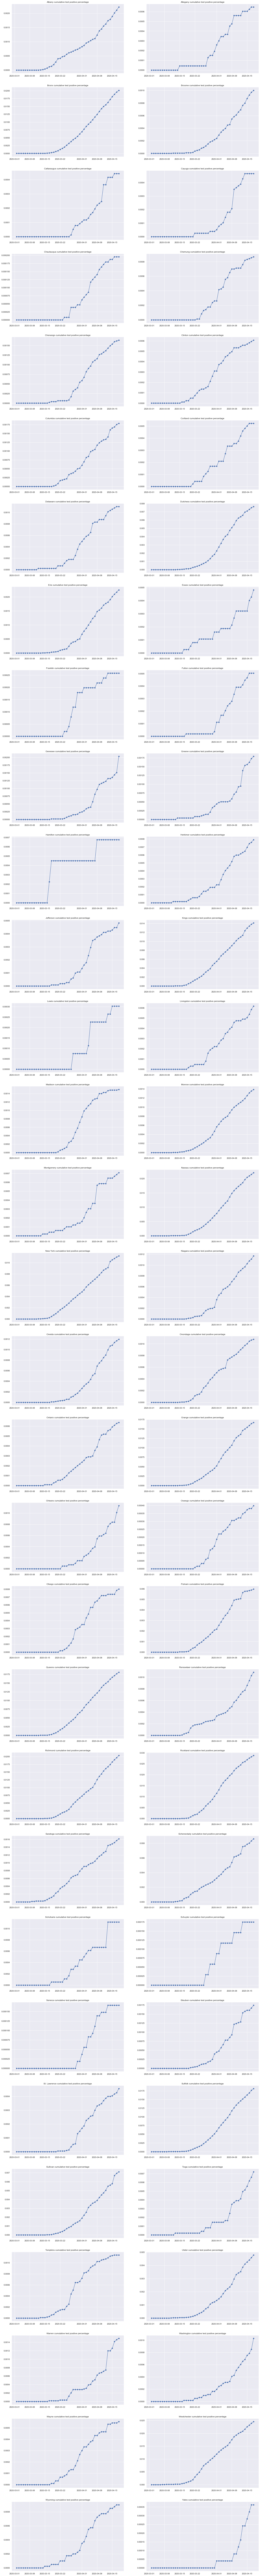

In [12]:
all_counties = joined_df.county.unique()
fig, axes = plt.subplots(31, 2, figsize=(24, 256))
axes = axes.flatten()
for i, county in enumerate(all_counties):
    county_df = joined_df[lambda x: x.county == county].sort_values("test_date")
    axes[i].plot(county_df.test_date, county_df.test_positive_percentage, "-o")
    axes[i].set_title(county + " cumulative test positive percentage")

#### Load the shape for each county in New York state plot severity  on map

In [13]:
state_shapes = shapefile.Reader("cugir-007865/cty036.shp")
len(state_shapes.shapes())

67

In [64]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

def plot_map_fill(color_values, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for id, shape in enumerate(sf.shapeRecords()):
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color, alpha=color_values[id])
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def plot_percentage_map_asof(joined_df, date, column):
    date_df = joined_df[lambda x: x.test_date == date]
    shapes_df = read_shapefile(state_shapes)
    county_percentages = np.array([date_df[date_df.county == county][column].to_numpy()[0] for county in shapes_df.NAME])
    alphas = (county_percentages - county_percentages.min()) / (county_percentages.max() -  county_percentages.min())
    plot_map_fill(alphas, state_shapes)
    plt.title(column + " map")

#### load couty data

In [99]:
county_details_df = pd.read_csv("2020_County_data.csv")
county_area_df = pd.read_csv("County_land_area.csv")
county_area_df.loc[county_area_df.County=="St Lawrence", "County"] = "St. Lawrence"
county_details_joined_df = pd.merge(pd.merge(joined_df, county_details_df, left_on="county", right_on="County"),county_area_df, left_on="county", right_on="County")
county_details_joined_df["person_per_square_mile"] = county_details_joined_df.total_population / county_details_joined_df["Land area Square/mi"].apply(lambda x: x.replace(",", "")).astype(float)
county_details_joined_df["test_case_per_person_per_square_mile"] = county_details_joined_df.cumulative_number_of_positives / county_details_joined_df.person_per_square_mile
county_details_joined_df["testing_per_person"] = county_details_joined_df.cumulative_number_of_tests.astype(int) / county_details_joined_df.total_population
county_details_joined_df

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests,total_population,population_over_65,population_over_80,"Diabetes prevalence (current, type I, II) (%)",...,Race-African American,Race-Hispanic/Latino,Education-Bacehlors or Higher,No Health Insurance Percentage,Median income,County_y,Land area Square/mi,person_per_square_mile,test_case_per_person_per_square_mile,testing_per_person
0,2020-04-18,Albany,34,682,305,7032,307117,"40,840","6,641",9%,...,28.2,28.7,41.6,21.5,47169.0,Albany,522.8,587.446442,1.160957,0.022897
1,2020-04-17,Albany,29,648,291,6727,307117,"40,840","6,641",9%,...,28.2,28.7,41.6,21.5,47169.0,Albany,522.8,587.446442,1.103079,0.021904
2,2020-04-16,Albany,38,619,273,6436,307117,"40,840","6,641",9%,...,28.2,28.7,41.6,21.5,47169.0,Albany,522.8,587.446442,1.053713,0.020956
3,2020-04-15,Albany,33,581,301,6163,307117,"40,840","6,641",9%,...,28.2,28.7,41.6,21.5,47169.0,Albany,522.8,587.446442,0.989026,0.020067
4,2020-04-14,Albany,13,548,106,5862,307117,"40,840","6,641",9%,...,28.2,28.7,41.6,21.5,47169.0,Albany,522.8,587.446442,0.932851,0.019087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,2020-03-06,Yates,0,0,0,0,24841,"4,066",492,14%,...,NaN,NaN,24.5,29.7,34634.0,Yates,338.14,73.463654,0.000000,0.000000
2972,2020-03-05,Yates,0,0,0,0,24841,"4,066",492,14%,...,NaN,NaN,24.5,29.7,34634.0,Yates,338.14,73.463654,0.000000,0.000000
2973,2020-03-04,Yates,0,0,0,0,24841,"4,066",492,14%,...,NaN,NaN,24.5,29.7,34634.0,Yates,338.14,73.463654,0.000000,0.000000
2974,2020-03-03,Yates,0,0,0,0,24841,"4,066",492,14%,...,NaN,NaN,24.5,29.7,34634.0,Yates,338.14,73.463654,0.000000,0.000000


<Figure size 792x648 with 0 Axes>

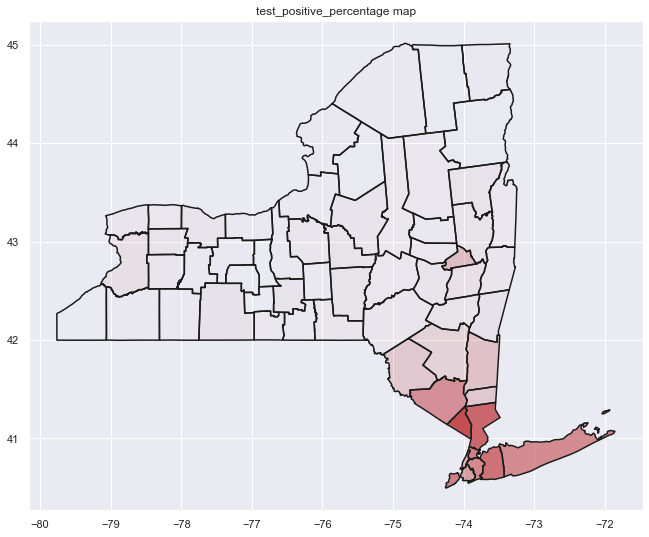

<Figure size 792x648 with 0 Axes>

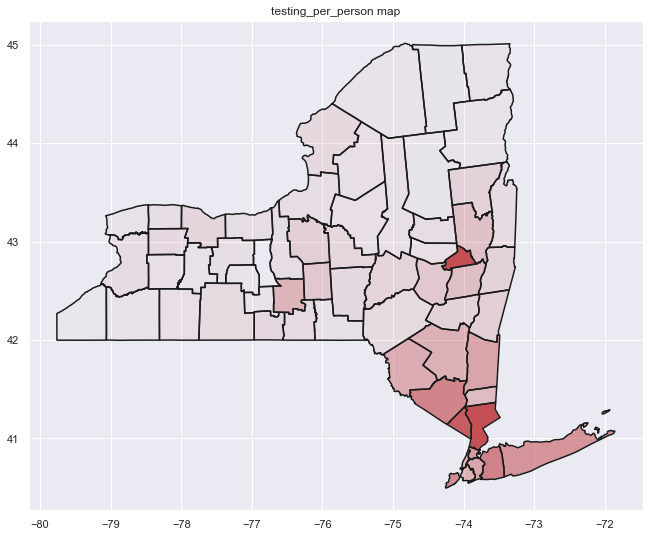

<Figure size 792x648 with 0 Axes>

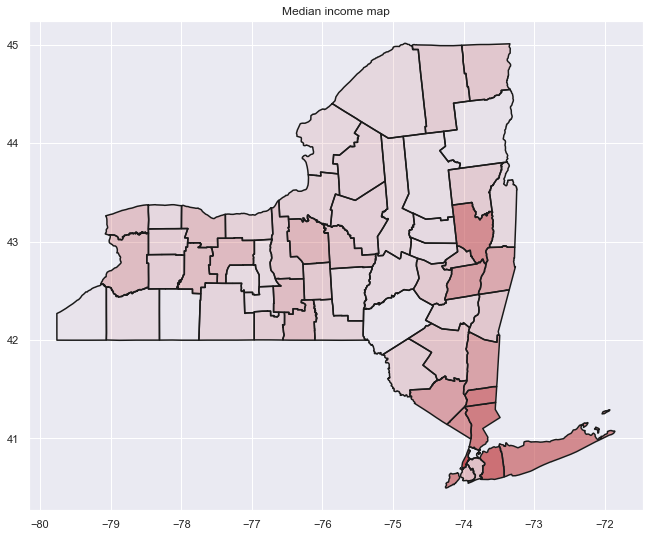

<Figure size 792x648 with 0 Axes>

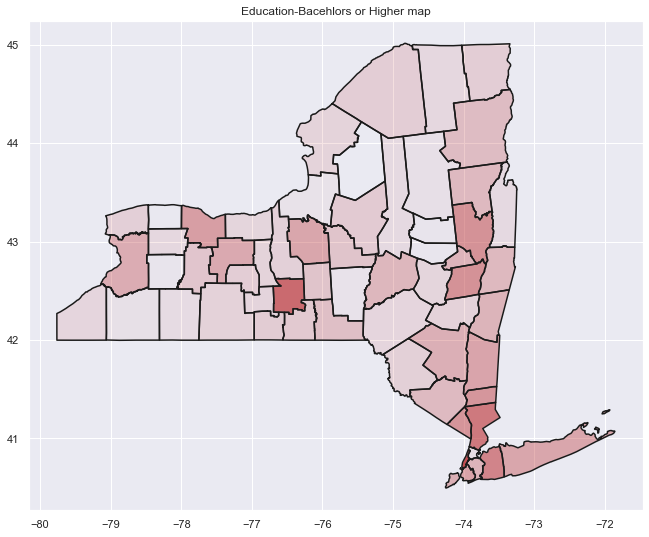

<Figure size 792x648 with 0 Axes>

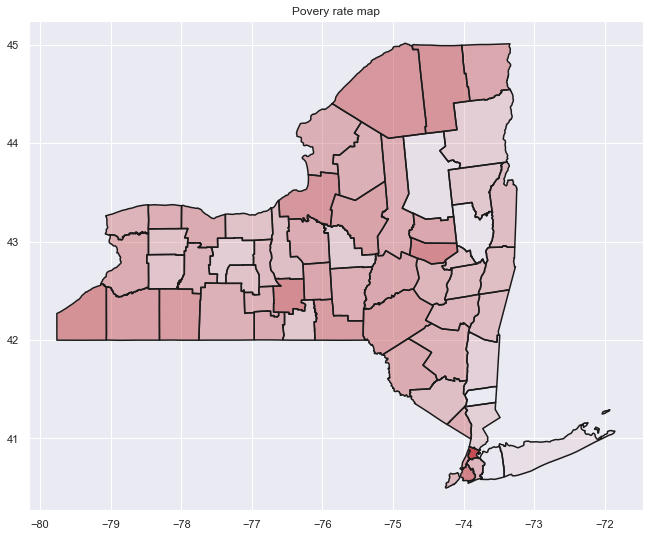

<Figure size 792x648 with 0 Axes>

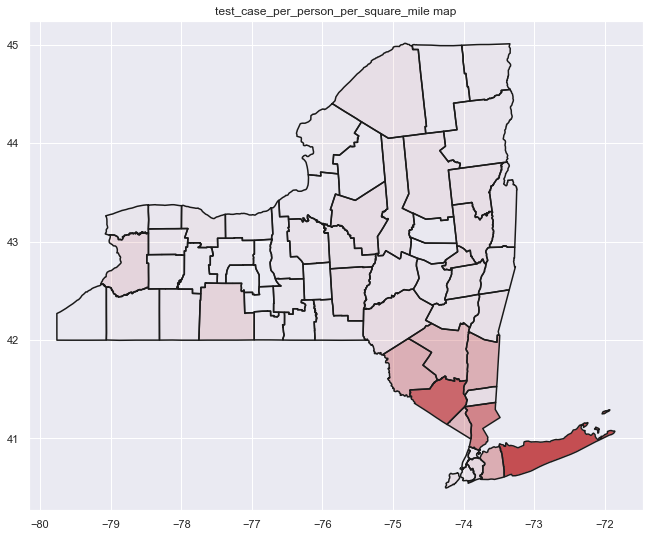

In [100]:
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "test_positive_percentage")
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "testing_per_person")
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "Median income")
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "Education-Bacehlors or Higher")
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "Povery rate")
plot_percentage_map_asof(county_details_joined_df, "2020-04-15", "test_case_per_person_per_square_mile")